In [982]:
#importing the libraries 
import numpy as np # linear algebra
import pandas as pd # data processing with CSV 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

Imported all the required packages that we may need.

In [983]:
#Reading the Dataset and Displaying the head of it.
data=pd.read_csv("/content/drive/MyDrive/bank-additional-full.csv", sep = ";")
data.name = "data"
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


What are the data types? (Only numeric and categorical)

In [984]:
#Data types of the columns present in the DataSet
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

We can see from above that out of the 21 columns present in the dataset, there are 10 Numerical datatypes and 11 Categorical ones.

Numerical/Quantitative DataTypes:
Numerical data refers to the data that is in the form of numbers, and not in any language or descriptive form.
ex:
age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed       

Categorical/Qualitative DataTypes:
Categorical data refers to a data type that can be stored and identified based on the names or labels given to them.
ex:
job,marital,education,default,housing,loan,poutcome,contact,month,day_of_week,y                  

In [985]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Using Describe helps us to understand the data in much better sense, we can now see the range, means, standard deviations, max-min and percentiles of the data, which helps us make better sense of the data.

As we can see from above that the data ranges of the columns are vastly different (ie: nr.employed mean 5167.035911 and emp.var.rate mean 0.081886). So to mprove the quality of our data we need to normalize it.

In [986]:
data.count()

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
y                 41188
dtype: int64

Are there missing values?

In [987]:
# We need to check missing values in dataset
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [988]:
# We need to check missing values in dataset
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

isnull():
This function takes a scalar or array-like object and indicates whether values are missing. And we can see that there are no Null values in our dataset.



In [989]:
# To check duplicated values 
print(data.duplicated().value_counts()) 

False    41176
True        12
dtype: int64


Checking for duplicate values and droping them.

In [990]:
data = data.drop_duplicates()

In [991]:
# To check duplicated values 
print(data.duplicated().value_counts()) 

False    41176
dtype: int64


In [992]:
# Lets count numbers of row for 'y' type
data.groupby("y").size()

y
no     36537
yes     4639
dtype: int64

In [993]:
data['y'].value_counts()/data.shape[0]

no     0.887337
yes    0.112663
Name: y, dtype: float64

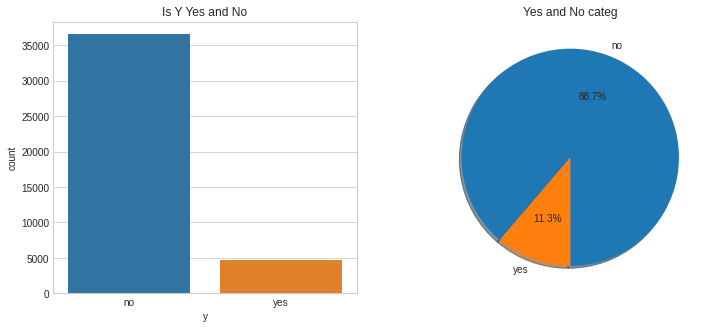

In [994]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='y',data=data)
plt.title("Is Y Yes and No")
plt.subplot(1,2,2)
labels =data['y'].value_counts(sort = True).index
sizes = data['y'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Yes and No categ',size = 12)
plt.show()


What are the likely distributions of the numeric variables?

From below we can observe the likely distributions of all the numeric variables.

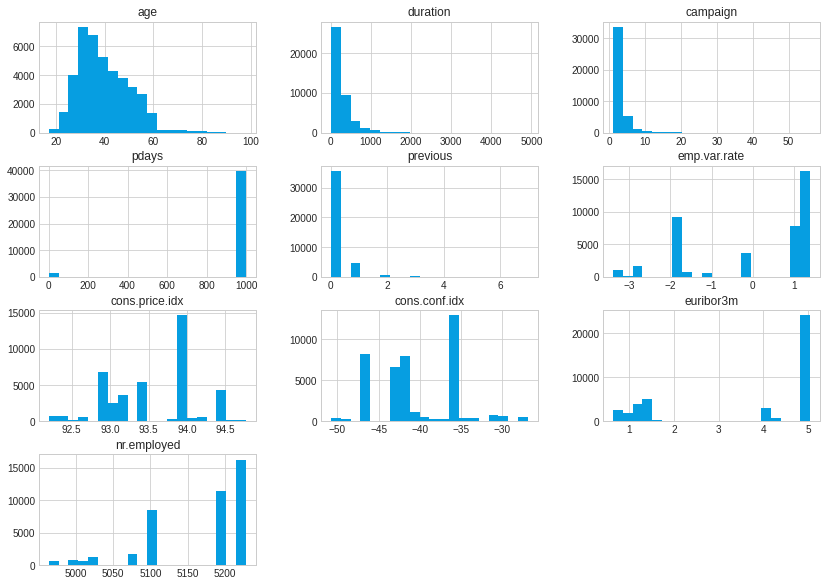

In [995]:
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

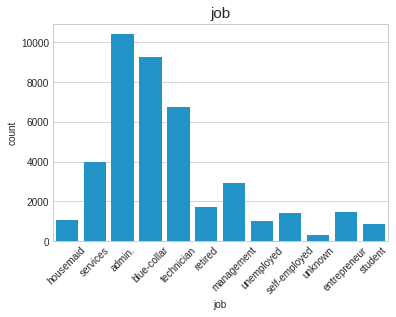

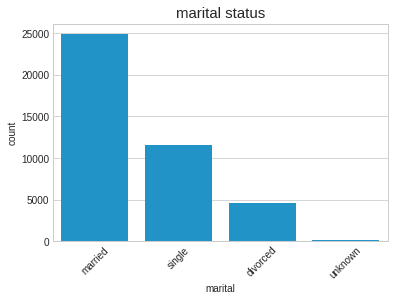

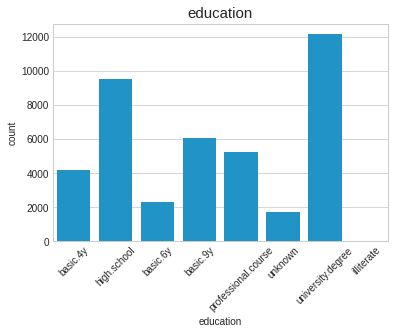

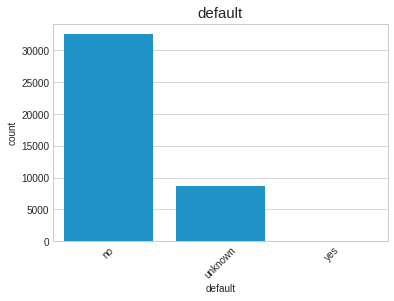

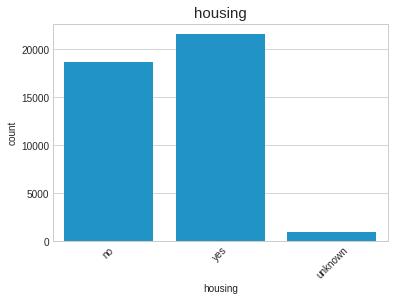

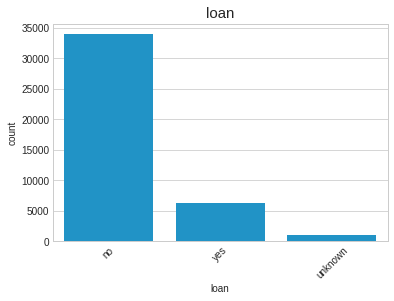

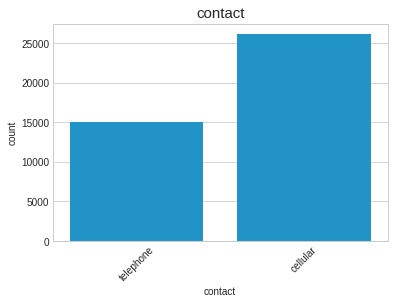

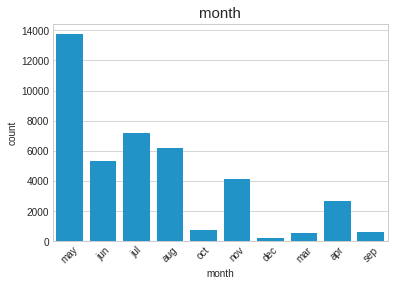

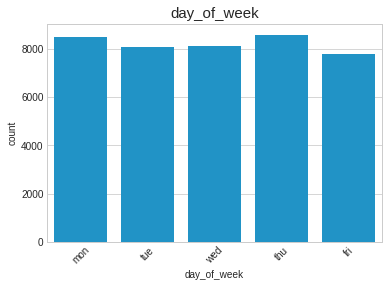

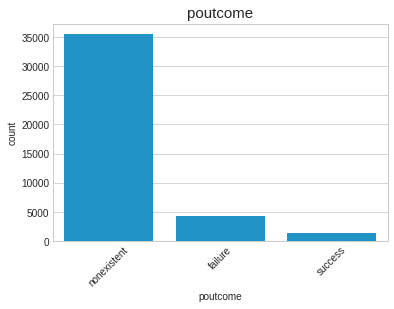

In [996]:
def countplot_features(df_train, feature, title):          
    #plt.figure(figsize = (15, 7))
    sns.countplot(df_train[feature], color = '#069EE1')
    plt.title(title, fontsize=15)
    plt.xticks(rotation=45)
    plt.show();
countplot_features(data, 'job', 'job')
countplot_features(data, 'marital', 'marital status')
countplot_features(data, 'education', 'education')
countplot_features(data, 'default', 'default')
countplot_features(data, 'housing', 'housing')
countplot_features(data, 'loan', 'loan')
countplot_features(data, 'contact', 'contact')
countplot_features(data, 'month', 'month')
countplot_features(data, 'day_of_week', 'day_of_week')
countplot_features(data, 'poutcome', 'poutcome')

In [997]:
drop_list = ["day_of_week","contact"]
data.drop(drop_list,axis=1,inplace=True)

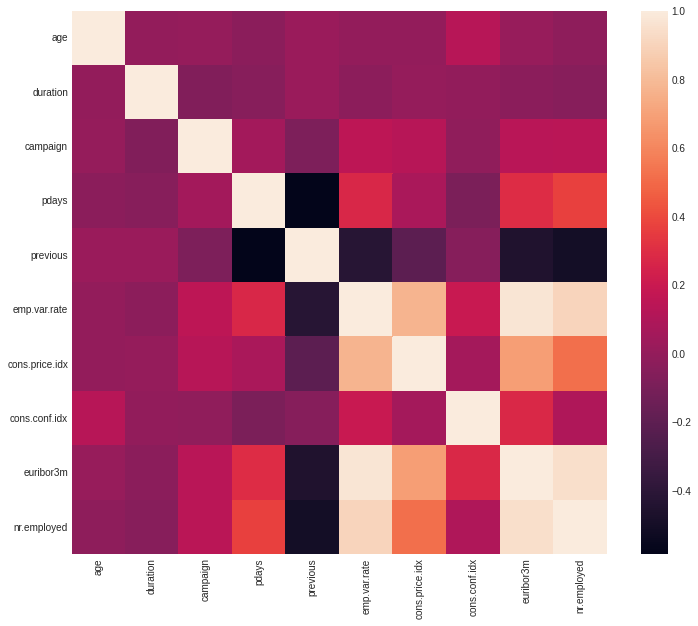

In [998]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor)
plt.show()

In [999]:
corr = data.corr()
corr_greater_than_75 = corr[corr>=.75]
corr_greater_than_75

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,0.775293,NaN,0.972244,0.906949
cons.price.idx,NaN,NaN,NaN,NaN,NaN,0.775293,1.000000,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,0.972244,NaN,NaN,1.000000,0.945146
nr.employed,NaN,NaN,NaN,NaN,NaN,0.906949,NaN,NaN,0.945146,1.000000


In [1000]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
data['job']      = labelencoder_X.fit_transform(data['job']) 
data['marital']  = labelencoder_X.fit_transform(data['marital']) 
data['education']= labelencoder_X.fit_transform(data['education']) 
data['default']  = labelencoder_X.fit_transform(data['default']) 
data['housing']  = labelencoder_X.fit_transform(data['housing']) 
data['loan']     = labelencoder_X.fit_transform(data['loan']) 
data['month']     = labelencoder_X.fit_transform(data['month']) 
data['poutcome']     = labelencoder_X.fit_transform(data['poutcome'])
data['y']     = labelencoder_X.fit_transform(data['y'])

In [1001]:
data['age'].max()

98

In [1002]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 25, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 25) & (dataframe['age'] <= 35), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 35) & (dataframe['age'] <= 50), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 50) & (dataframe['age'] <= 70), 'age'] = 4
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(data);

In [1003]:
data.head()

,age,job,marital,education,default,housing,loan,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,0,0,6,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,4,7,1,3,1,0,0,6,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,3,7,1,3,0,2,0,6,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,3,0,1,1,0,0,0,6,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,4,7,1,3,0,0,2,6,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


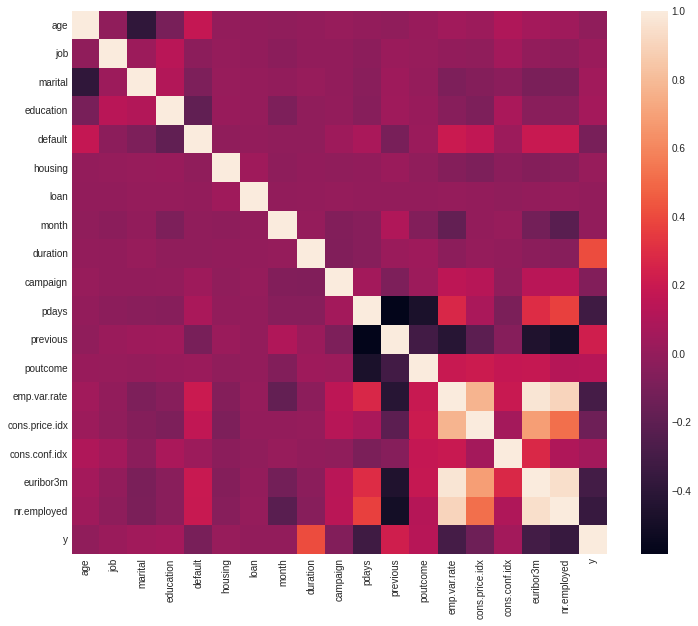

In [1004]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor)
plt.show()

In [1005]:
corr = data.corr()
corr_greater_than_50 = corr[corr>=.5]
corr_greater_than_50

,age,job,marital,education,default,housing,loan,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1006]:
data.corr()["y"].sort_values(ascending=False)

y                 1.000000
duration          0.405297
previous          0.230202
poutcome          0.129810
education         0.057776
cons.conf.idx     0.054802
marital           0.046249
job               0.025248
housing           0.011613
loan             -0.004922
month            -0.006051
age              -0.011381
campaign         -0.066361
default          -0.099364
cons.price.idx   -0.136134
emp.var.rate     -0.298289
euribor3m        -0.307740
pdays            -0.324948
nr.employed      -0.354669
Name: y, dtype: float64

In [1007]:
data.to_csv(r'/content/drive/MyDrive/bank-cleaned.csv')

In [1008]:
from sklearn.model_selection import  train_test_split

In [1009]:
x = data.drop("y", axis=1)
y = data['y']

In [1010]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 2]
from sklearn.feature_selection import SelectKBest, f_classif
#X_clf_new = SelectKBest(score_func=chi2,k=10).fit_transform(X_clf,y_clf)
# Create and fit selector
selector = SelectKBest(f_classif, k=10)
selector.fit(x, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = x.iloc[:,cols]

In [1011]:
print(features_df_new)
#below are the 10 most important features for our model.

       default  duration  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0       261         1    999         0         1           1.1   
1            1       149         1    999         0         1           1.1   
2            0       226         1    999         0         1           1.1   
3            0       151         1    999         0         1           1.1   
4            0       307         1    999         0         1           1.1   
...        ...       ...       ...    ...       ...       ...           ...   
41183        0       334         1    999         0         1          -1.1   
41184        0       383         1    999         0         1          -1.1   
41185        0       189         2    999         0         1          -1.1   
41186        0       442         1    999         0         1          -1.1   
41187        0       239         3    999         1         0          -1.1   

       cons.price.idx  euribor3m  nr.employed  
0  

In [1012]:
drop_list = ["cons.conf.idx","marital","month","loan","housing"]
x.drop(drop_list,axis=1,inplace=True)

In [1013]:
data2=pd.read_csv("/content/drive/MyDrive/bank-cleaned.csv")

In [1014]:
drop_list = ["cons.conf.idx","marital","month","loan","housing"]
data2.drop(drop_list,axis=1,inplace=True)

In [1015]:
data2.to_csv(r'/content/drive/MyDrive/bank-cleaned.csv')

In [1016]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.1, random_state=42)

In [1017]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

In [1018]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler # Import for standard scaling of the data
from sklearn.preprocessing import MinMaxScaler # Import for standard scaling of the data
from sklearn.metrics import r2_score, mean_squared_error 
import lightgbm as lgb
from lightgbm import LGBMClassifier, LGBMRegressor, early_stopping, Dataset
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# tested MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(X_train)
X_test_mm_scaled = ss.transform(X_test)
# program to run multilple models though sklearn 
# Default settings output accuracy and classification report
# compares accuracy for scaled and unscaled data
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    
    models = [   
          ('Logistic Regression', LogisticRegression()),       
          ('Random Forest', RandomForestClassifier(random_state=2020)),
          ('Decision Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('Light bgm', LGBMClassifier()),
          ('XG Boost', XGBClassifier()),
          ('GradientBoosting', GradientBoostingClassifier()),
          ('Hyperparameter Tuned lightGBM' , LGBMClassifier(random_state=100, n_estimators=200, min_child_samples=40, max_depth=20, verbose=0))

        ]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)
         
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        
        
        # output
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test,y_pred)
        print('R^2 score on test set =',r2)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
            print("                            -----------------------------------               \n")      
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
            print("                            -----------------------------------               \n")     
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))      
            print("                            -----------------------------------               \n")             

In [1019]:
#run Decision Trees, Random Forest, KNN and SVM
run_models(X_train, y_train, X_test, y_test)

Logistic Regression:
---------------------------------------------------------------
Accuracy: 0.90845
Accuracy w/Scaled Data (ss): 0.90845
Accuracy w/Scaled Data (mm): 0.90845
Mean squared error: 0.09
R^2 score on test set = 0.09953047558560046

Classification Report (mm):
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      3645
           1       0.69      0.37      0.48       473

    accuracy                           0.91      4118
   macro avg       0.81      0.67      0.72      4118
weighted avg       0.90      0.91      0.90      4118

                            -----------------------------------               

Random Forest:
---------------------------------------------------------------
Accuracy: 0.91161
Accuracy w/Scaled Data (ss): 0.91161
Accuracy w/Scaled Data (mm): 0.91161
Mean squared error: 0.09
R^2 score on test set = 0.13058114884126948

Classification Report (mm):
               precision    recall  f1-score   s

In [1020]:
Lbgm = LGBMClassifier()
model = Lbgm.fit(X_train, y_train)

<BarContainer object of 13 artists>

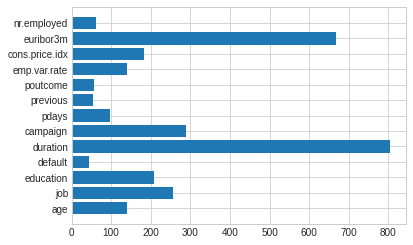

In [1021]:
plt.barh(x.columns, Lbgm.feature_importances_)

In [1022]:
#confusion matrix
y_pred=model.predict(x_test)
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[3158,  487],
       [ 292,  181]])

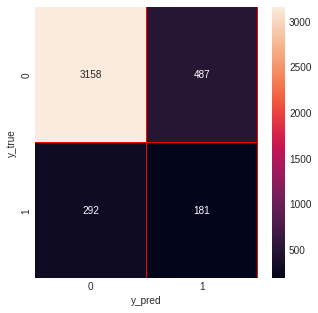

In [1023]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [1024]:
!pip install shap
#Installing SHAP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1025]:
import shap

In [1026]:
shap_values = shap.TreeExplainer(Lbgm).shap_values(x_test)

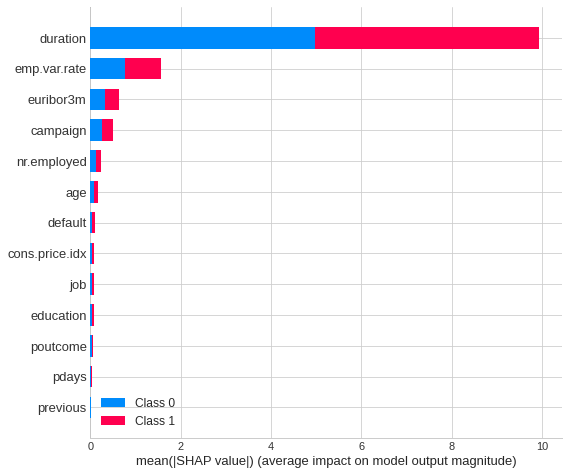

In [1027]:
shap.summary_plot(shap_values, x_test)

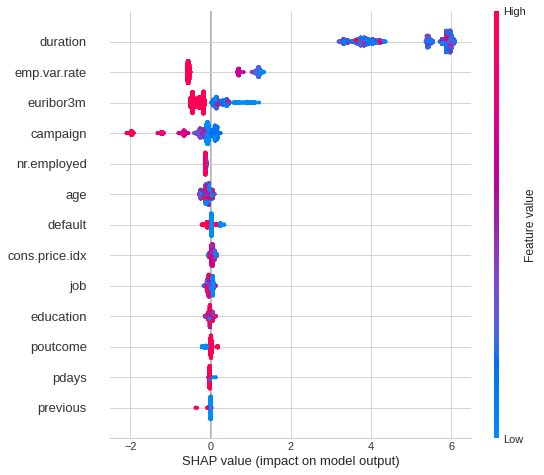

In [1028]:
import shap  # package used to calculate Shap values
# Create object that can calculate shap values
explainer = shap.TreeExplainer(Lbgm)
# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(x_test)
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1],x_test)

In [1029]:
lgb_params= {'learning_rate': 0.045, 
             'n_estimators': 20000, 
             'max_bin': 94,
             'num_leaves': 5, 
             'max_depth': 30, 
             'reg_alpha': 8.457, 
             'reg_lambda': 6.853, 
             'subsample': 0.749}

In [1030]:
from lightgbm import LGBMClassifier
lightGBM = LGBMClassifier(random_state=100, n_estimators=200, min_child_samples=40, max_depth=20, verbose=0)
lightGBM.fit(x_train, y_train)

LGBMClassifier(max_depth=20, min_child_samples=40, n_estimators=200,
               random_state=100, verbose=0)

In [1031]:
#confusion matrix
y_pred=lightGBM.predict(x_test)
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[3525,  120],
       [ 227,  246]])

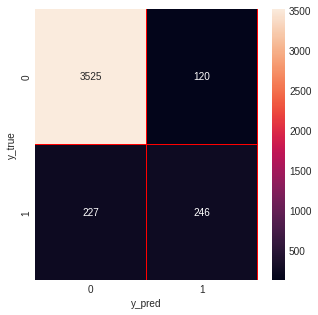

In [1032]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()